## Import Library & Data

In [1]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from mpstemmer import MPStemmer
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import requests
import csv
from io import StringIO
from wordcloud import WordCloud

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification


import os

2025-11-16 12:06:39.799485: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/itsgoy21/main/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/itsgoy21/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/itsgoy21/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/itsgoy21/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:

os.chdir("/mnt/d/Data/My Skill/Analyze Review App Netflix")
print(os.getcwd()) 

/mnt/d/Data/My Skill/Analyze Review App Netflix


In [4]:
scrapreview, _ = reviews(
    'com.spotify.music',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=20000
)

In [5]:
df = pd.DataFrame(scrapreview)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9306a286-4860-4de2-bcd2-11eba8405ba4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aku senang bisa dengerin lagu sambil main game,5,0,9.0.98.261,2025-11-15 12:06:21,None,NaT,9.0.98.261
1,f23b12a5-8eb3-4a14-85a0-e1969ad9d916,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus,5,0,None,2025-11-15 12:04:16,None,NaT,None
2,0b02cd77-ee9d-4955-b251-6ed8b620fbc1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"dikit dikit iklan, sekali iklan keluar 2 iklan...",3,0,9.0.94.274,2025-11-15 12:00:29,None,NaT,9.0.94.274
3,b2205707-4d8c-4b6a-b451-fee452576473,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya ingin menyampaikan bahwa saya kurang coco...,2,0,9.0.94.274,2025-11-15 11:59:47,None,NaT,9.0.94.274
4,24408a78-a904-44bd-9212-56bf2a24b785,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,banyak lagu yang saya suka,5,0,None,2025-11-15 11:54:44,None,NaT,None


In [6]:
df.to_csv("Review App Spotify.csv", index=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              20000 non-null  object        
 1   userName              20000 non-null  object        
 2   userImage             20000 non-null  object        
 3   content               20000 non-null  object        
 4   score                 20000 non-null  int64         
 5   thumbsUpCount         20000 non-null  int64         
 6   reviewCreatedVersion  14906 non-null  object        
 7   at                    20000 non-null  datetime64[ns]
 8   replyContent          1987 non-null   object        
 9   repliedAt             1987 non-null   datetime64[ns]
 10  appVersion            14906 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.7+ MB


In [8]:
clean_df = df.drop(columns=['reviewId', 'userImage', 'replyContent', 'repliedAt'])
clean_df = clean_df.dropna()
clean_df = clean_df.drop_duplicates()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14906 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              14906 non-null  object        
 1   content               14906 non-null  object        
 2   score                 14906 non-null  int64         
 3   thumbsUpCount         14906 non-null  int64         
 4   reviewCreatedVersion  14906 non-null  object        
 5   at                    14906 non-null  datetime64[ns]
 6   appVersion            14906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 931.6+ KB


## Data Preprocessing

In [9]:
url = "https://raw.githubusercontent.com/ezaaputra/Sentiment-Analysis-Using-BERT/refs/heads/main/kamus_alay.csv"
slangwords = pd.read_csv(url)
slangwords.head()

,slang,formal
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [10]:
def casefoldingtext(text):
    text = text.lower()
    return text

def cleaningtext(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'(\w+)²', r'\1', text)
    text = re.sub(r'\b(\w+)\1\b', r'\1', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = " ".join([w for w in text.split() if len(w) > 1])
    text = emoji.demojize(text)
    text = re.sub(':[A-Za-z_-]+:', ' ', text)
    text = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', text)
    text = text.replace('\n', '')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

normalize_word_dict = {}
for index, row in slangwords.iterrows():
    if row[0] not in normalize_word_dict:
        normalize_word_dict[row[0]] = row[1]

def fix_slangwords(text):
    list_text = word_tokenize(text)
    list_text = [normalize_word_dict[term] if term in normalize_word_dict else term for term in list_text]
    text = " ".join(list_text)
    return text

def tokenizingtext(text):
    text = word_tokenize(text)
    return text

stemmer = MPStemmer()
cache ={}
def stemmingtext(words):
    stemmed_words = []
    for word in words:
        if word in cache:
            stemmed_words.append(cache[word])
        else:
            stem = stemmer.stem(word)
            cache[word] = stem
            stemmed_words.append(stem)
    return stemmed_words

def filteringtext(text):
    factory = StopWordRemoverFactory()
    listStopwords = set(factory.get_stop_words())
    listStopwords1 = set(stopwords.words('indonesian'))
    listStopwords2 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(listStopwords2)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = [txt for txt in text if txt not in listStopwords]
    text = filtered
    return text

def tosentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

/tmp/ipykernel_9501/2189585805.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalize_word_dict:
/tmp/ipykernel_9501/2189585805.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalize_word_dict[row[0]] = row[1]


In [11]:
teks = "  au mau      memberi makan gaga tidak berguna      "
tokens = word_tokenize(teks)
print(cleaningtext(teks))
print(stemmingtext(tokens))
print(filteringtext(tokens))  

au mau memberi makan ga tidak berguna
['au', 'mau', 'beri', 'makan', 'gaga', 'tidak', 'guna']
['au', 'makan', 'gaga', 'berguna']


In [12]:
clean_df['text_casefoldingText'] = clean_df['content'].apply(casefoldingtext)
clean_df['text_clean'] = clean_df['text_casefoldingText'].apply(cleaningtext)
clean_df['text_slangwords'] = clean_df['text_clean'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingtext)
clean_df['text_stemming'] = clean_df['text_tokenizingText'].apply(stemmingtext)
clean_df['text_stopwords'] = clean_df['text_stemming'].apply(filteringtext)
clean_df['text_akhir'] = clean_df['text_stopwords'].apply(tosentence)

In [13]:
clean_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_casefoldingText,text_clean,text_slangwords,text_tokenizingText,text_stemming,text_stopwords,text_akhir
0,Pengguna Google,aku senang bisa dengerin lagu sambil main game,5,0,9.0.98.261,2025-11-15 12:06:21,9.0.98.261,aku senang bisa dengerin lagu sambil main game,aku senang bisa dengerin lagu sambil main game,aku senang bisa dengarkan lagu sambil main game,"[aku, senang, bisa, dengarkan, lagu, sambil, m...","[aku, senang, bisa, dengar, lagu, sambil, main...","[senang, dengar, lagu, main, game]",senang dengar lagu main game
2,Pengguna Google,"dikit dikit iklan, sekali iklan keluar 2 iklan...",3,0,9.0.94.274,2025-11-15 12:00:29,9.0.94.274,"dikit dikit iklan, sekali iklan keluar 2 iklan...",dikit dikit iklan sekali iklan keluar iklan pe...,dikit dikit iklan sekali iklan keluar iklan pe...,"[dikit, dikit, iklan, sekali, iklan, keluar, i...","[dikit, dikit, iklan, sekali, iklan, keluar, i...","[dikit, dikit, iklan, iklan, iklan, periklan, ...",dikit dikit iklan iklan iklan periklan detik hem
3,Pengguna Google,Saya ingin menyampaikan bahwa saya kurang coco...,2,0,9.0.94.274,2025-11-15 11:59:47,9.0.94.274,saya ingin menyampaikan bahwa saya kurang coco...,saya ingin menyampaikan bahwa saya kurang coco...,saya ingin menyampaikan bahwa saya kurang coco...,"[saya, ingin, menyampaikan, bahwa, saya, kuran...","[saya, ingin, sampai, bahwa, saya, kurang, coc...","[cocok, ubah, paket, harga, premium, paket, in...",cocok ubah paket harga premium paket individua...
6,Pengguna Google,lagunya gk enak banyak iklan menyinggung,1,0,9.0.94.274,2025-11-15 11:46:34,9.0.94.274,lagunya gk enak banyak iklan menyinggung,lagunya gk enak banyak iklan menyinggung,lagunya enggak enak banyak iklan menyinggung,"[lagunya, enggak, enak, banyak, iklan, menying...","[lagu, tidak, enak, banyak, iklan, singgung]","[lagu, enak, iklan, singgung]",lagu enak iklan singgung
8,Pengguna Google,bagus,5,0,9.0.94.274,2025-11-15 11:40:57,9.0.94.274,bagus,bagus,bagus,[bagus],[bagus],[bagus],bagus


In [14]:
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')

  for row in reader:
    lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')

  for row in reader:
    lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")
    
def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]
  polarity = ''
  if (score > 0):
    polarity = 'positive'
  elif (score < 0):
    polarity = 'negative'
  else:
    polarity = 'neutral'

  return score, polarity

results = clean_df['text_stopwords'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    6443
negative    5183
neutral     3280
Name: count, dtype: int64


In [15]:
clean_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_casefoldingText,text_clean,text_slangwords,text_tokenizingText,text_stemming,text_stopwords,text_akhir,polarity_score,polarity
0,Pengguna Google,aku senang bisa dengerin lagu sambil main game,5,0,9.0.98.261,2025-11-15 12:06:21,9.0.98.261,aku senang bisa dengerin lagu sambil main game,aku senang bisa dengerin lagu sambil main game,aku senang bisa dengarkan lagu sambil main game,"[aku, senang, bisa, dengarkan, lagu, sambil, m...","[aku, senang, bisa, dengar, lagu, sambil, main...","[senang, dengar, lagu, main, game]",senang dengar lagu main game,7,positive
2,Pengguna Google,"dikit dikit iklan, sekali iklan keluar 2 iklan...",3,0,9.0.94.274,2025-11-15 12:00:29,9.0.94.274,"dikit dikit iklan, sekali iklan keluar 2 iklan...",dikit dikit iklan sekali iklan keluar iklan pe...,dikit dikit iklan sekali iklan keluar iklan pe...,"[dikit, dikit, iklan, sekali, iklan, keluar, i...","[dikit, dikit, iklan, sekali, iklan, keluar, i...","[dikit, dikit, iklan, iklan, iklan, periklan, ...",dikit dikit iklan iklan iklan periklan detik hem,-8,negative
3,Pengguna Google,Saya ingin menyampaikan bahwa saya kurang coco...,2,0,9.0.94.274,2025-11-15 11:59:47,9.0.94.274,saya ingin menyampaikan bahwa saya kurang coco...,saya ingin menyampaikan bahwa saya kurang coco...,saya ingin menyampaikan bahwa saya kurang coco...,"[saya, ingin, menyampaikan, bahwa, saya, kuran...","[saya, ingin, sampai, bahwa, saya, kurang, coc...","[cocok, ubah, paket, harga, premium, paket, in...",cocok ubah paket harga premium paket individua...,25,positive
6,Pengguna Google,lagunya gk enak banyak iklan menyinggung,1,0,9.0.94.274,2025-11-15 11:46:34,9.0.94.274,lagunya gk enak banyak iklan menyinggung,lagunya gk enak banyak iklan menyinggung,lagunya enggak enak banyak iklan menyinggung,"[lagunya, enggak, enak, banyak, iklan, menying...","[lagu, tidak, enak, banyak, iklan, singgung]","[lagu, enak, iklan, singgung]",lagu enak iklan singgung,-1,negative
8,Pengguna Google,bagus,5,0,9.0.94.274,2025-11-15 11:40:57,9.0.94.274,bagus,bagus,bagus,[bagus],[bagus],[bagus],bagus,-2,negative


In [16]:
clean_df.to_csv("Clean DataSet Review App Spotify.csv", index=False)

## EDA

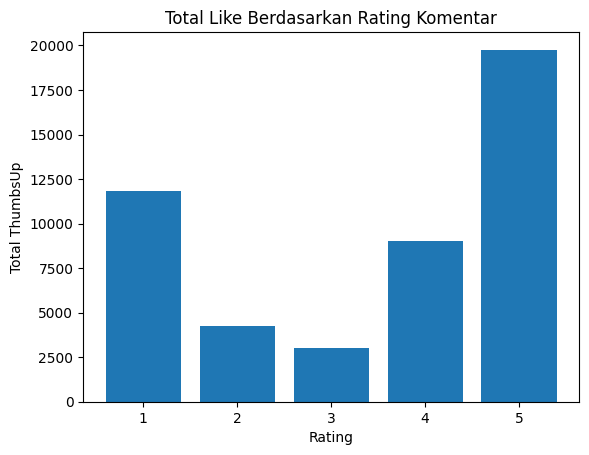

In [17]:
score_group = clean_df.groupby('score')['thumbsUpCount'].sum()
plt.bar(score_group.index, score_group.values)
plt.xlabel('Rating')
plt.ylabel('Total ThumbsUp')
plt.title('Total Like Berdasarkan Rating Komentar')
plt.show()

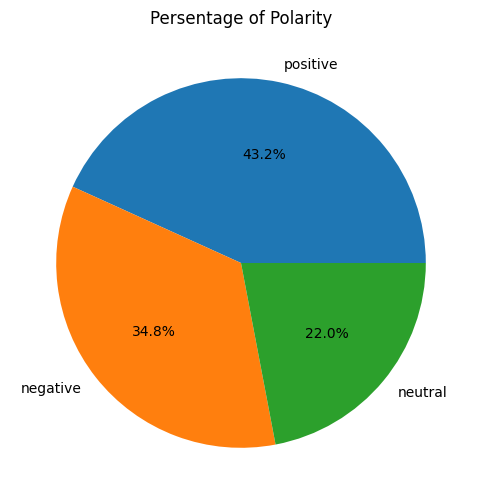

In [18]:
polarity_persentage = clean_df['polarity'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(polarity_persentage, labels=polarity_persentage.index, autopct='%1.1f%%')
plt.title("Persentage of Polarity")
plt.show()

In [19]:
polarity_positive = clean_df[clean_df['polarity'] == 'positive']
polarity_negative = clean_df[clean_df['polarity'] == 'negative']
polarity_neutral = clean_df[clean_df['polarity'] == 'neutral']

all_teks_positive = ' '.join(polarity_positive['text_akhir'])
all_teks_negative = ' '.join(polarity_negative['text_akhir'])
all_teks_neutral = ' '.join(polarity_neutral['text_akhir'])

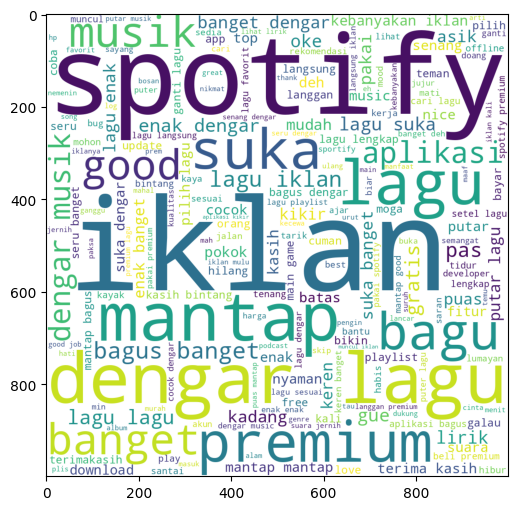

In [20]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(all_teks_positive)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.show()

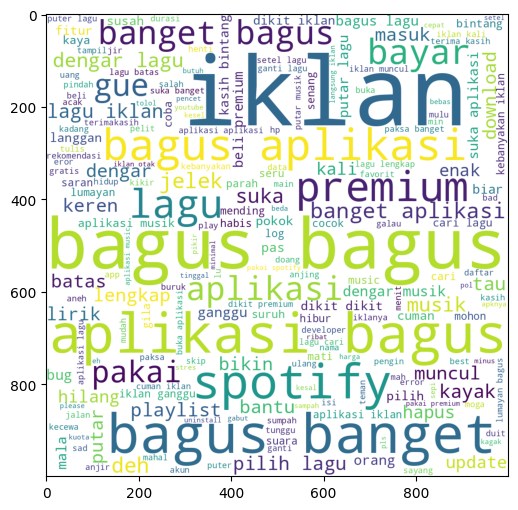

In [21]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(all_teks_negative)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.show()

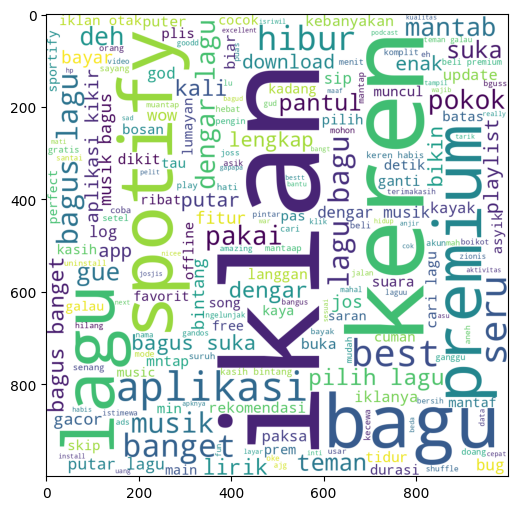

In [22]:
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(all_teks_neutral)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud)
plt.show()

## Data Spliting

In [23]:
X = clean_df["text_akhir"]
y = clean_df["polarity"]

In [24]:
le = LabelEncoder()
y = le.fit_transform(y)
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
print(clean_df.groupby("polarity").size())

{np.int64(0): np.int64(5183), np.int64(1): np.int64(3280), np.int64(2): np.int64(6443)}
polarity
negative    5183
neutral     3280
positive    6443
dtype: int64


In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [26]:
print("Train size:", len(X_train))
print("Eval size :", len(X_eval))
print("Test size :", len(X_test))

Train size: 7453
Eval size : 3726
Test size : 3727


## IndoBert

In [27]:
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

def encode(texts, labels):
    tokens = tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors='tf'
    )
    return tokens, tf.convert_to_tensor(labels.tolist())

X_train_tok, y_train_tf = encode(X_train, y_train)
X_eval_tok, y_eval_tf = encode(X_eval, y_eval)
X_test_tok, y_test_tf = encode(X_test, y_test)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
I0000 00:00:1763269630.364609    9501 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9555 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:05:00.0, compute capability: 8.9


In [28]:
num_labels = len(set(y))

model = TFAutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=num_labels
)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy("accuracy")]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [30]:
history = model.fit(
    dict(input_ids=X_train_tok["input_ids"], attention_mask=X_train_tok["attention_mask"]),
    y_train_tf,
    validation_data=(
        dict(input_ids=X_eval_tok["input_ids"], attention_mask=X_eval_tok["attention_mask"]),
        y_eval_tf
    ),
    epochs=5,         
    batch_size=16
)

Epoch 1/5


2025-11-16 12:07:33.765321: I external/local_xla/xla/service/service.cc:163] XLA service 0x7d95b76e9070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-16 12:07:33.765345: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-11-16 12:07:33.772007: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-16 12:07:33.786773: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
I0000 00:00:1763269653.859963    9675 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


466/466 [==============================] - 98s 140ms/step - loss: 0.3838 - accuracy: 0.8538 - val_loss: 0.2642 - val_accuracy: 0.9037
Epoch 2/5
466/466 [==============================] - 59s 127ms/step - loss: 0.1998 - accuracy: 0.9309 - val_loss: 0.2688 - val_accuracy: 0.9082
Epoch 3/5
466/466 [==============================] - 56s 120ms/step - loss: 0.1246 - accuracy: 0.9585 - val_loss: 0.2710 - val_accuracy: 0.9147
Epoch 4/5
466/466 [==============================] - 58s 126ms/step - loss: 0.0922 - accuracy: 0.9697 - val_loss: 0.2697 - val_accuracy: 0.9098
Epoch 5/5
466/466 [==============================] - 59s 126ms/step - loss: 0.0682 - accuracy: 0.9777 - val_loss: 0.3210 - val_accuracy: 0.9173


In [31]:
results = model.evaluate(
    dict(input_ids=X_test_tok["input_ids"], attention_mask=X_test_tok["attention_mask"]),
    y_test_tf
)

print("\n🔹 Test Loss:", results[0])
print("🔹 Test Accuracy:", results[1])

117/117 [==============================] - 8s 52ms/step - loss: 0.3086 - accuracy: 0.9147

🔹 Test Loss: 0.3086499571800232
🔹 Test Accuracy: 0.9146766662597656


In [32]:
texts = ["Produknya bagus banget!", "Pelayanan buruk sekali"]
enc = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="tf")
preds = model.predict(enc)

pred_labels = tf.argmax(preds.logits, axis=1).numpy()
labels_name = le.inverse_transform(pred_labels)
print("\nPrediksi label:", labels_name)

1/1 [==============================] - 2s 2s/step

Prediksi label: ['neutral' 'negative']


In [33]:
model.save_pretrained("./my_model")


In [34]:
tokenizer.save_pretrained("./my_model")

('./my_model/tokenizer_config.json',
 './my_model/special_tokens_map.json',
 './my_model/vocab.txt',
 './my_model/added_tokens.json',
 './my_model/tokenizer.json')

In [36]:
import json

label2id = {label: int(i) for i, label in enumerate(le.classes_)}
id2label = {int(i): label for i, label in enumerate(le.classes_)}


with open("./my_model/labels.json", "w") as f:
    json.dump({
        "label2id": label2id,
        "id2label": id2label
    }, f)
